# Import libreries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Github/HM2

/content/drive/MyDrive/Github/HM2


In [3]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime


# Import the dataset

In [4]:
dates_attributes = ['timestamp_created', 'timestamp_updated', 'author.last_played']

dataset = pd.read_csv('df_cleaned.csv', parse_dates=dates_attributes)
dataset_reviews = pd.read_csv('df_reviews.csv', parse_dates=dates_attributes[:-1])
dateset_author = pd.read_csv('df_author.csv', parse_dates=[dates_attributes[-1]])

# [RQ1] After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an Exploratory Data Analysis (EDA). What can you say about our dataset? Please summarize its main characteristics with visual and tabular methods.

In [109]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21612444 entries, 0 to 21612443
Data columns (total 21 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   app_id                          int64         
 1   app_name                        object        
 2   review_id                       int64         
 3   language                        object        
 4   timestamp_created               datetime64[ns]
 5   timestamp_updated               datetime64[ns]
 6   recommended                     bool          
 7   votes_helpful                   int64         
 8   votes_funny                     int64         
 9   weighted_vote_score             float64       
 10  comment_count                   int64         
 11  steam_purchase                  bool          
 12  received_for_free               bool          
 13  written_during_early_access     bool          
 14  author.steamid                  int64         
 

Our dataset consists of 2 main dataframes, one for the reviews attributes and the other for the author attributes.

We have 21 attributes. 3 describe dates and the rest is a  combination between string, int, float, and boolean. 

We have 21612444 entries after cleaning. There are null values in two attributes only (author.playtime_at_review & author.last_played) so we will handle them only in case we need to include them in our analysis.

Here's a describtion for the attributes:
* What game was the review written for: app_id, app_name ;
* in what language was the review: language ;
* whether it recommends or not recommended;
* information about the review: review_id, review;
* the time review was written and the time it was updated: timestamp_created, timestamp_updated
* how useful the review was: votes_helpful, votes_funny, weighted_vote_score;
* how many comments (replies) were written on the review comment_count
* whether the author bought the game or received it for free: steam_purchase,received_for_free;
* whether the author wrote a review when the game was in pre-release: written_during_early_access.

* Information about the Author (steam account): their identification key: author.steamid;
* how many games he has: author.num_games_owned;
* how many reviews he wrote: author.num_reviews;
* how many hours he played in total: author.playtime_forever;
* whether he played in the last two weeks: author.playtime_last_two_weeks;
* how long he played the game to write a review: author.playtime_at_review;
* the date of his last game: author.last_played;

Let's make a quick analysis about the most and least reviewed games in our dataset.

In [111]:
def extract_top_last_3(series):
    temp_value = []
    temp_index = []
    temp_value.extend(series.values[:3])
    temp_value.extend(series.values[-3:])
    
    temp_index.extend(series.index[:3])
    temp_index.extend(series.index[-3:])
    
    return  pd.Series(data=temp_value, index=temp_index)

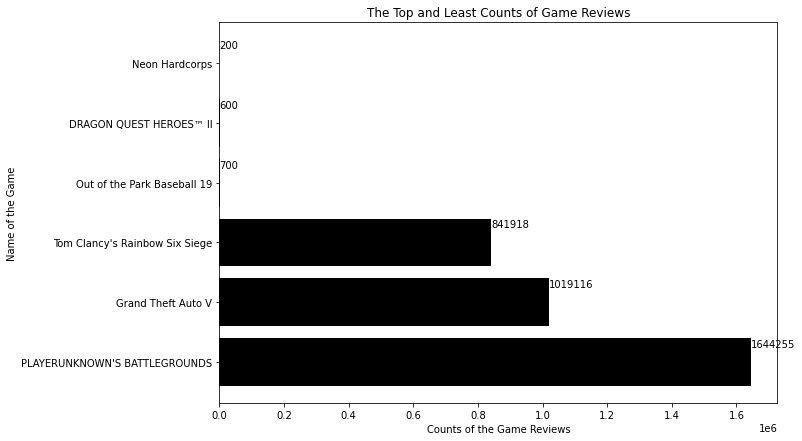

In [112]:
# Creating pandas series that contains the top and least 3 games name and the corresponding review counts.
games = extract_top_last_3(dataset_reviews.app_name.value_counts())

# Specify the arguments of matplotlib barh function.
locations = np.arange(len(games))
heights = list(games)
labels = games.index

f = plt.figure(figsize=(10, 7))

ax1 = f.add_subplot(1, 1, 1)
ax1.barh(locations, heights, tick_label=labels, color='k')
ax1.set_title("The Top and Least Counts of Game Reviews")
ax1.set_ylabel("Name of the Game")
ax1.set_xlabel("Counts of the Game Reviews");

# To print each value alongside with its bar.
for i, v in enumerate(heights):
    ax1.text(v + 3, i + .25, str(v), color='k')

Let's make a quick analysis about the used languages for the reviews in our dataset.

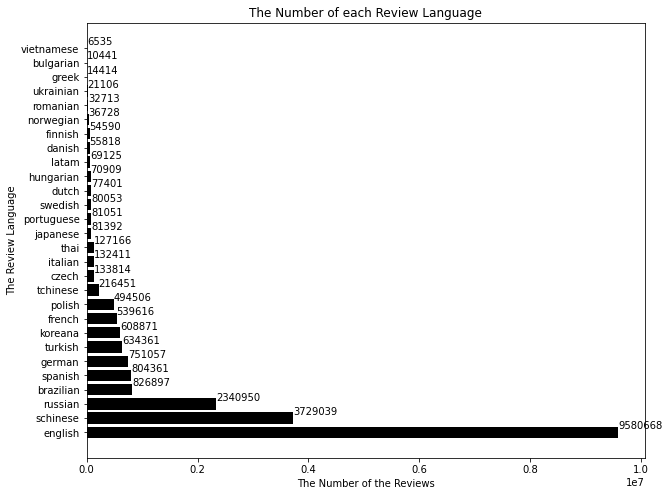

In [113]:
# Creating pandas series that contains the top and least 3 games name and the corresponding review counts.
games = dataset_reviews.language.value_counts()

# Specify the arguments of matplotlib barh function.
locations = np.arange(len(games))
heights = list(games)
labels = games.index

f = plt.figure(figsize=(10, 8))

ax1 = f.add_subplot(1, 1, 1)
ax1.barh(locations, heights, tick_label=labels, color='k')
ax1.set_title("The Number of each Review Language")
ax1.set_ylabel("The Review Language")
ax1.set_xlabel("The Number of the Reviews");

# To print each value alongside with its bar.
for i, v in enumerate(heights):
    ax1.text(v + 3, i + .25, str(v), color='k')

Any other charactristics are already described in the Data Wrangling part during Assessing and Cleaning the Data.

# [RQ2] Let's explore the dataset by finding simple insights into the reviews

## [RQ2.1] plot the number of reviews for each application in descending order

I'm creating a dataframeGroupby to store information for each application

In [5]:
app_group = dataset.groupby("app_name")

Counting the number of reviews for each group/application. Plot the application in descending order in a logarithmic scale for visibility pourpose

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 40857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23830 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65290 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32676 missing from current font.
  font.set_

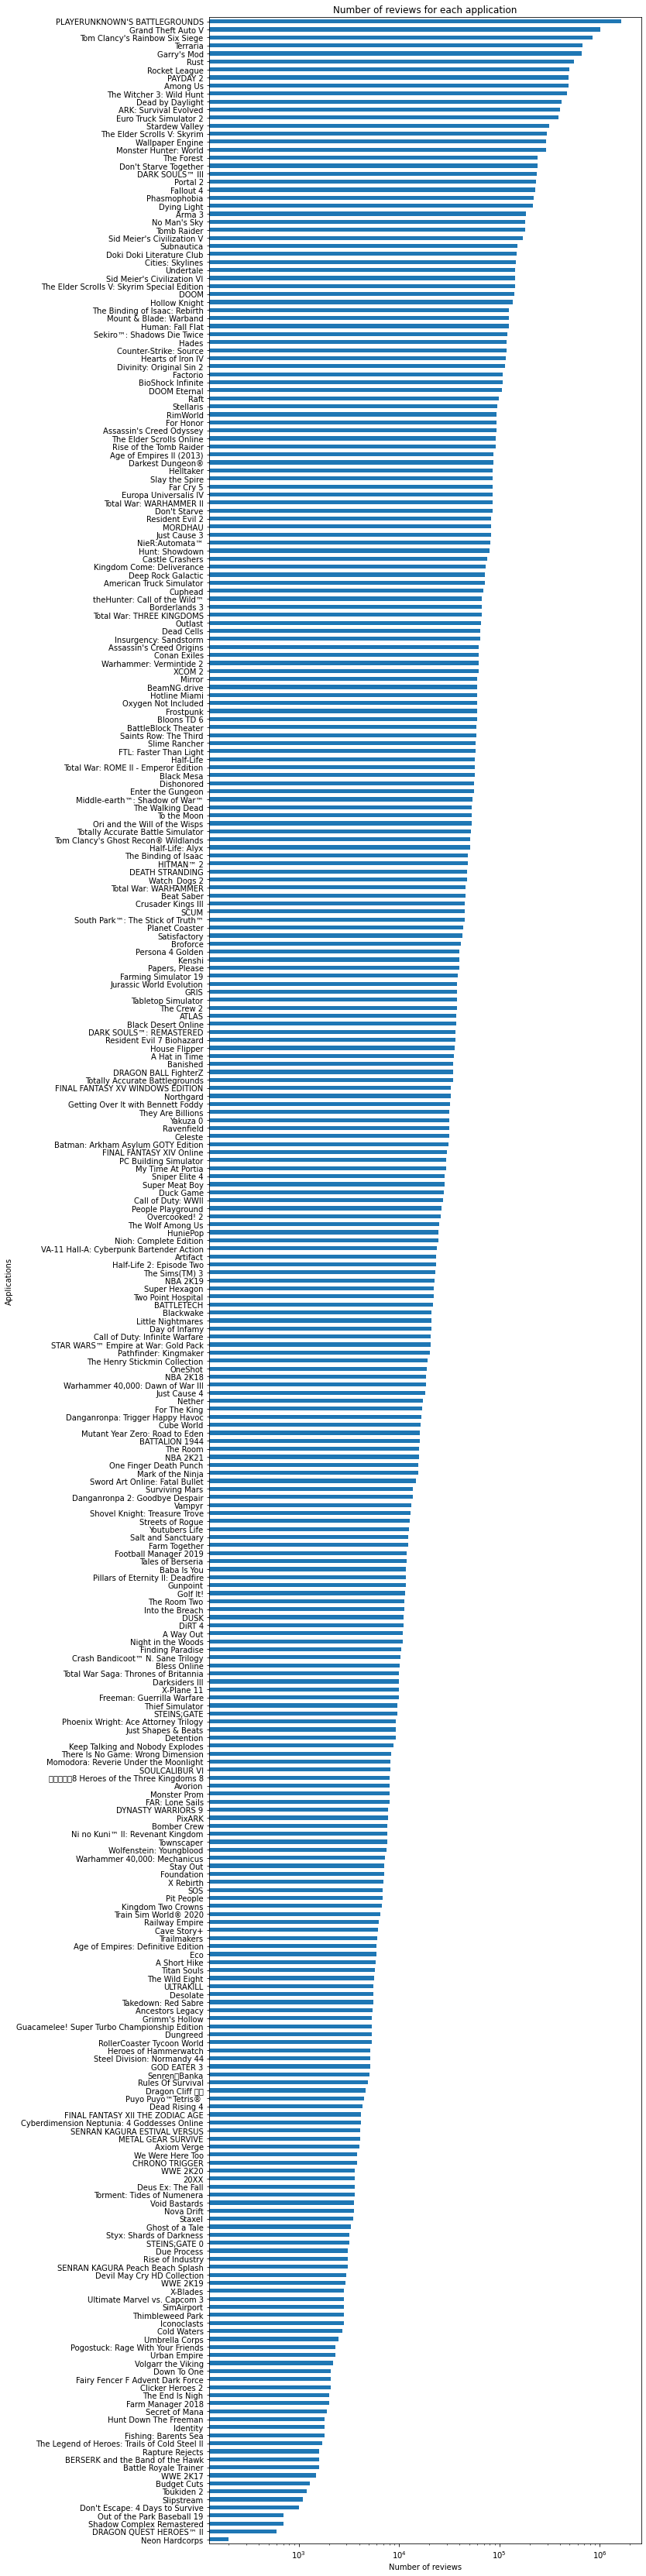

In [6]:
review_appcount = app_group["review_id"].count().sort_values(ascending=True)

ax = review_appcount.plot(kind = "barh", title = "Number of reviews for each application", figsize=(10, 60), logx = True)
ax.set_xlabel("Number of reviews")
ax.set_ylabel("Applications")
plt.show()

I have done a logx plot to better visualize the date, infact the highest application have a bigger x value respect the lowest. For the question we need to view a descending order of the application reviewed and with the logx plot i can also compare the biggest with the lowest. In standard plot we saw the descending order of the application, but for the most of the application the bar takes approx 0 value.

We can se that the biggest number of reviews is done to __PLAYERUNKNOWN'S BATTLEGROUNDS__, and the lowest number of reviews is done to __Neon Hardcorps__

## [RQ2.2] What applications have the best Weighted Vote Score?

Compute max of each group for the category "weighted_vote_score" and take the best score.

Output the 5 best to complete view of the best result.

In [7]:
fivemaxscore_app = app_group["weighted_vote_score"].max().nlargest(5)
print(fivemaxscore_app)

app_name
Stardew Valley              0.995987
Divinity: Original Sin 2    0.995245
Subnautica                  0.994453
Mirror                      0.994038
Wallpaper Engine            0.993540
Name: weighted_vote_score, dtype: float64


In [8]:
maxscore_app = list(fivemaxscore_app.index)[0]
print(maxscore_app)

Stardew Valley


The application with the best Weighted Vote Score is: __Stardew Valley__ with __0.995987__ of score.

Second is __Divinity: Original Sin 2__ with  __0.995245__ of score, and third is __Subnautica__  with __0.994453__ of score.

## [RQ2.3] Which applications have the most and the least recommendations?

"Recommended" is boolean type (True = 1, False = 0). If we sum over each group by recommended value, we can take the most and the least recommendated app

In [9]:
recommended_app = app_group["recommended"].sum().sort_values(ascending=False)

In [10]:
print("The best recommended app is:\n", recommended_app.head(2),"\n")
print("The least recommended app is:\n", recommended_app.tail(2))

The best recommended app is:
 app_name
PLAYERUNKNOWN'S BATTLEGROUNDS    886417
Grand Theft Auto V               831311
Name: recommended, dtype: int64 

The least recommended app is:
 app_name
DRAGON QUEST HEROES™ II    423
Neon Hardcorps              89
Name: recommended, dtype: int64


The best recommended app is __PLAYERUNKNOWN'S BATTLEGROUNDS__.

The least recommended app is __Neon Hardcorps__

## [RQ2.4] How many of these applications were purchased, and how many were given for free?


Purchased and given for free are booleans ( True = 1, False = 0). If we sum over each group by purchase (or received for free) value we can count how many of those.

In [11]:
# getting keys of groupby best and least recommended app
best_app = recommended_app.head(1).index[0]
least_app = recommended_app.tail(1).index[0]

In [12]:
how_many_purchase_bestapp = app_group["steam_purchase"].get_group(best_app).sum()
how_many_free_bestapp = app_group["received_for_free"].get_group(best_app).sum()

In [13]:
how_many_purchase_leastapp = app_group["steam_purchase"].get_group(least_app).sum()
how_many_free_leastapp = app_group["received_for_free"].get_group(least_app).sum()

In [14]:
print("How many were purchased?\n", best_app, ": ",how_many_purchase_bestapp,"\n",least_app, ": ",how_many_purchase_leastapp)
print("\nHow many were given for free?\n", best_app, ": ",how_many_free_bestapp,"\n",least_app, ": ",how_many_free_leastapp)

How many were purchased?
 PLAYERUNKNOWN'S BATTLEGROUNDS :  1372721 
 Neon Hardcorps :  29

How many were given for free?
 PLAYERUNKNOWN'S BATTLEGROUNDS :  61443 
 Neon Hardcorps :  27


Table with the result for the best and least app recommended

In [15]:
df = pd.DataFrame([[how_many_purchase_bestapp,how_many_purchase_leastapp],[how_many_free_bestapp,how_many_free_leastapp]],
                  index = [best_app, least_app],
                  columns = ["Purchase","Given for free"])
df.style

,Purchase,Given for free
PLAYERUNKNOWN'S BATTLEGROUNDS,1372721,29
Neon Hardcorps,61443,27


# [RQ3] Now it's important to understand the preferred time to do reviews.

Creating a new df that includes only the attributes that we are interested in.

In [18]:
review_date = dataset_reviews[['review_id', 'timestamp_created']].copy()

Getting rid of the date in the datetime attribute since we are interested only in hours, minutes, and seconds.

In [19]:
review_date['time_created'] = review_date.timestamp_created.dt.time

In [20]:
review_date.drop(columns='timestamp_created', inplace=True)

In [21]:
review_date_count = review_date.groupby('time_created').count()
display(review_date_count.head(3))
review_date_count.tail(3)

,review_id
time_created,
00:00:00,193
00:00:01,222
00:00:02,196


,review_id
time_created,
23:59:57,179
23:59:58,244
23:59:59,212


Making sure that we don't have any missing values in the interval of a full day!

In [22]:
day_range = pd.date_range(start=str(review_date_count.index[0]), 
                          end=str(review_date_count.index[-1]), 
                          freq='S').time
day_range

array([datetime.time(0, 0), datetime.time(0, 0, 1),
       datetime.time(0, 0, 2), ..., datetime.time(23, 59, 57),
       datetime.time(23, 59, 58), datetime.time(23, 59, 59)], dtype=object)

In [23]:
(day_range != review_date_count.index).sum()

0

Great! Our dataset now includes a value for each second of an entire day, 24 hours.

## [RQ3.1] What is the most common time that authors review an application? For example, authors usually write a review at 17:44

In [24]:
most_common_time = review_date_count.loc[review_date_count['review_id'] == review_date_count.max()[0]]
most_common_time

,review_id
time_created,
15:54:53,571


Authors usually write a review at 15:54:53.

## [RQ3.2] Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.


In [25]:
def plot_reviews_num(review_date_count, time_intervals):
    review_date_count = review_date_count.reset_index()
    
    interval_labels = []
    intervals_counts = []
    
    for idx, (init_time, final_time) in enumerate(time_intervals):
        init_time = datetime.strptime(init_time, '%H:%M:%S').time()
        final_time = datetime.strptime(final_time, '%H:%M:%S').time()
        
        interval_labels.append('{}#: {} - {}'.format(idx, init_time, final_time))
        
        counts = review_date_count.query("@init_time <= time_created <= @final_time").review_id.sum()
        intervals_counts.append(counts)
    
    locations = np.arange(len(intervals_counts)) 
    
    
    f = plt.figure(figsize=(20, 7))

    ax1 = f.add_subplot(1, 1, 1)
    ax1.bar(locations, intervals_counts, tick_label=interval_labels, color='k')
    ax1.set_title("Number of Reviews for Each Interval")
    ax1.set_xlabel("Time Intervals")
    ax1.set_ylabel("Number of Reviews");

## [RQ3.3] Use the function that you created in the previous literal to plot the number of reviews between the following time intervals:



| Initial time | Final time |
| ----------- | ----------- |
|06:00:00 | 10:59:59|
|11:00:00 | 13:59:59|
|14:00:00 | 16:59:59|
|17:00:00 | 19:59:59|
|20:00:00 | 23:59:59|
|00:00:00 | 02:59:59|
|03:00:00 | 05:59:59|

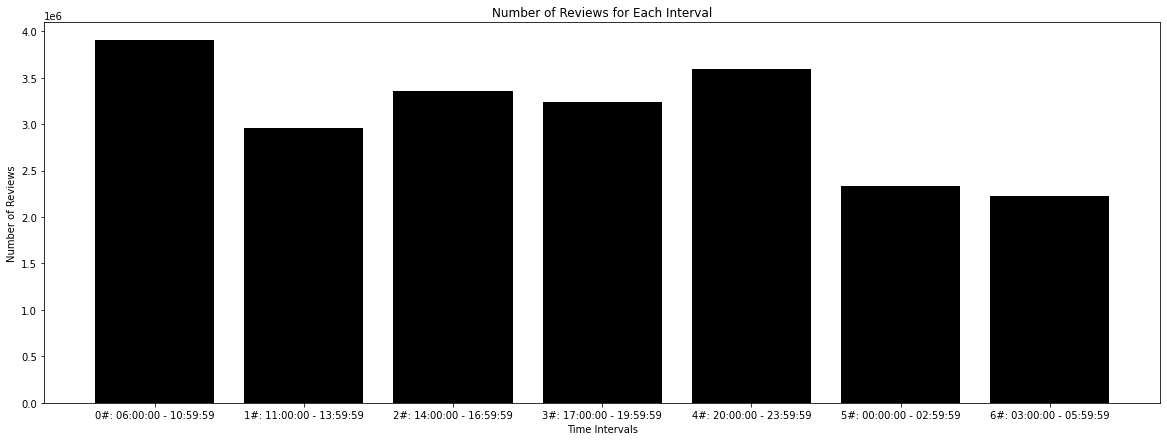

In [26]:
plot_reviews_num(review_date_count, 
                 [('06:00:00', '10:59:59'), 
                  ('11:00:00', '13:59:59'), 
                  ('14:00:00', '16:59:59'), 
                  ('17:00:00', '19:59:59'), 
                  ('20:00:00', '23:59:59'), 
                  ('00:00:00', '02:59:59'), 
                  ('03:00:00', '05:59:59')])

# [RQ4] As Steam is a worldwide platform, the reviews can be done in many languages. Let's extract some information about it.

## [RQ4.1] What are the top 3 languages used to review applications?

Each review is writting in one languages, so we groupby language and count the occurencies of the language for each group

In [27]:
n = 3

top_languages = dataset.groupby("language")["language"].count().sort_values(ascending = False)[:n]

In [28]:
top_languages

language
english     9580668
schinese    3729039
russian     2340950
Name: language, dtype: int64

In [29]:
top3_languages = list(top_languages[:3].index)
print(top3_languages)

['english', 'schinese', 'russian']


The top 3 languages used to review applications are:

__1:__ __english__ with 9635437 reviews <br>
__2:__ __schinese__ with 3764967 reviews<br>
__3:__ __russian__ with 2348900 reviews

## [RQ4.2] Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages

In [30]:
def filtered_language_reviews(dataset, languages):
    return dataset[dataset.language.isin(languages)]

## [RQ4.3] Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?

In the columns _funny_ and _helpful_ there is the number of steam account that voted that specific reviews as funny or helpful, so for count the number fo voted as funny (or helpful) just count the row of reviews with value > 0 (at least 1 vote)

In [31]:
filtered_dataset = filtered_language_reviews(dataset, top3_languages)

In [32]:
total_cases = filtered_dataset.shape[0]  
print(total_cases) 

15650657


In [33]:
fav_cases = filtered_dataset[filtered_dataset["votes_funny"] > 0].shape[0]
print(fav_cases)

1914182


In [34]:
percent_funny_reviews = 100*fav_cases/total_cases
print("{:.2f}%".format(percent_funny_reviews))

12.23%


The percentage of reviews wrote with the 3 top langauages voted as funny is: __12.21%__   (1922726/15749304)

## [RQ4.4] Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?

In [35]:
fav_cases = filtered_dataset[filtered_dataset["votes_helpful"] > 0].shape[0]
print(fav_cases)

4569398


In [36]:
percent_helpful_reviews = 100*fav_cases/total_cases
print("{:.2f}%".format(percent_helpful_reviews))

29.20%


The percentage of reviews wrote with the 3 top langauages voted as helpful is: __29.16%__  (4592926/15749304)

# [RQ5] The reviews' authors are users from the game that provide their opinion on it. Now you can check how often they make reviews.

#### [RQ5.1] Plot the top 10 most popular reviewers and the number of reviews

For each steam_id (i.e. person) we count how many reviews did he do in the csv dataset and plot the 10 most popular reviewers.

In [50]:
reviewer_group_top10 = dataset.groupby("author.steamid")["review_id"].count().nlargest(10)

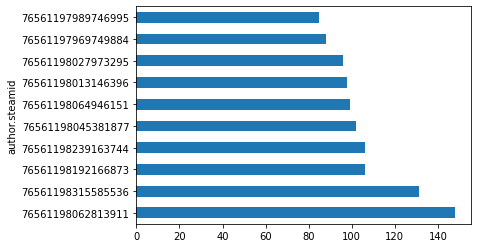

In [51]:
reviewer_group_top10.plot.barh(x = "author.steamid", y = "author.num_reviews")
plt.show()

## [RQ5.2] What applications did the most popular author review?

We take the steam_id of the top reviewer, than take the dataset of that person

In [52]:
steam_id_top_reviewer = list(reviewer_group_top10.head(1).index)[0]

In [53]:
top_reviewer_dataset = dataset[dataset["author.steamid"] == steam_id_top_reviewer].copy()

In [54]:
app_top_reviewer = top_reviewer_dataset["app_name"]

The list of the applications the most popular author reviews:

In [55]:
for app in app_top_reviewer:
    print("{}\n".format(app))


Half-Life

Counter-Strike: Source

Half-Life 2: Episode Two

Portal 2

Garry's Mod

Sid Meier's Civilization V

Dead by Daylight

Sid Meier's Civilization VI

Subnautica

Human: Fall Flat

Banished

Celeste

Getting Over It with Bennett Foddy

A Hat in Time

The Forest

Axiom Verge

The Binding of Isaac: Rebirth

To the Moon

Cave Story+

Titan Souls

Super Meat Boy

Don't Escape: 4 Days to Survive

Volgarr the Viking

Enter the Gungeon

Salt and Sanctuary

Hollow Knight

The End Is Nigh

Factorio

RimWorld

Insurgency: Sandstorm

Euro Truck Simulator 2

Foundation

Kenshi

Into the Breach

Warhammer: Vermintide 2

DOOM Eternal

Age of Empires: Definitive Edition

Void Bastards

Stardew Valley

Among Us

Blackwake

Little Nightmares

Bomber Crew

Rust

HITMAN™ 2

Phasmophobia

Mount & Blade: Warband

Resident Evil 2

Slime Rancher

Hotline Miami

Tomb Raider

BattleBlock Theater

Dishonored

South Park™: The Stick of Truth™

Undertale

Don't Starve

Rocket League

Dead Cells

Broforce


## [RQ5.3] How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.

We have a dataset groupby of the top reviewer in which are store all the information needed: 
- steam_purchase: Yes (True) / No (False)
- receved_for_free: Yes (True) / No (False)


In [56]:
total_cases = top_reviewer_dataset.shape[0] 
total_cases

148

In [57]:
number_of_purchase = top_reviewer_dataset[top_reviewer_dataset.steam_purchase == True].shape[0]
number_of_free = top_reviewer_dataset[top_reviewer_dataset.received_for_free == True].shape[0]

In [58]:
percent_of_purchase = 100*number_of_purchase/total_cases
percent_of_free = 100*number_of_free/total_cases

In [59]:
print("{:.2f}%".format(percent_of_purchase),"\n","{:.2f}%".format(percent_of_free))
print("\n\n",number_of_purchase,"\n",number_of_free)

73.65% 
 2.70%


 109 
 4


Among the applications he reviews in that period of time, the most popular author purchased __110__ of this applications (73.65%) and __4__ were given for free (2.70%).


## [RQ5.4] How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

In [60]:
purchase_app = top_reviewer_dataset[top_reviewer_dataset.steam_purchase == True]
free_app = top_reviewer_dataset[top_reviewer_dataset.received_for_free == True]

In [61]:
number_of_pur_pos = purchase_app[purchase_app.recommended == True].shape[0]
number_of_pur_pos

107

In [62]:
number_of_pur_neg = purchase_app[purchase_app.recommended == False].shape[0]
number_of_pur_neg

2

In [63]:
number_of_free_pos = free_app[free_app.recommended == True].shape[0]
number_of_free_pos

4

In [64]:
number_of_free_neg = free_app[free_app.recommended == False].shape[0]
number_of_free_neg

0

Among the __110__ application purchased they reviews he:<br>
give positive recommendation: to __108__ of them<br>
give negative recommendation: to __2__ of them


Among the __4__ application purchased they reviews he:<br>
give positive recommendation: to __4__ of them<br>
give negative recommendation: to __0__ of them



# [RQ6] It's time to get information from the updates that a user does to his reviews.

#### What is the average time (days and minutes) a user lets pass before he updates a review?

In [67]:
#Find time difference between updated and created time

df_start   = dataset["timestamp_created"]
df_updated = dataset["timestamp_updated"]


In [68]:
df_diff = df_updated-df_start

In [69]:
mean_time = df_diff[df_diff > "0 days 00:00:00"].mean()
mean_time

Timedelta('321 days 22:06:18.839744728')

In [70]:
def convert_time(time):
    seconds = time.seconds
    minutes = seconds // 60
    days = time.days
    return minutes, days

In [71]:
days, minutes = convert_time(mean_time)

In [72]:
print("{} Days and {} minutes".format(days,minutes))

1326 Days and 321 minutes


#### Plot the top 3 authors that usually update their reviews.

In [73]:
update_author = dataset[df_diff > "0 days 00:00:00"].groupby("author.steamid")

In [74]:
top3_author = update_author["review_id"].count().nlargest(3)

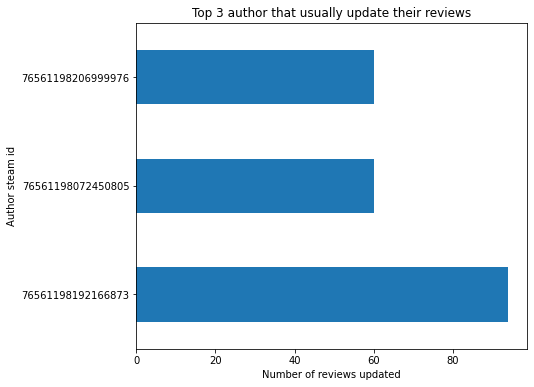

In [75]:
ax = top3_author.plot(kind = "barh", title = "Top 3 author that usually update their reviews", figsize=(7, 6))
ax.set_ylabel("Author steam id")
ax.set_xlabel("Number of reviews updated")
plt.show()

# [RQ7] Of course, calculating probabilities is a job that any Data Scientist must know. Let's compute Some interesting figures.

## [RQ7.1] What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?

In [84]:
dataset_reviews.query('weighted_vote_score >= 0.5').head(2)

,app_id,app_name,review_id,language,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
23,292030,The Witcher 3: Wild Hunt,85178836,schinese,2021-01-23 02:55:35,2021-01-23 02:55:35,True,1,0,0.523810,0,True,False,False
27,292030,The Witcher 3: Wild Hunt,85177648,schinese,2021-01-23 02:25:30,2021-01-23 05:24:55,True,39,0,0.784226,0,True,False,False


In [85]:
n_vote_score_larger_05 = dataset_reviews.query('weighted_vote_score >= 0.5').weighted_vote_score.count()

prob_score_larger = (n_vote_score_larger_05/len(dataset_reviews))*100

print("The probability that a review has a Weighted Vote Score equal to or bigger than 0.5 is {:.2f}%". 
      format(prob_score_larger))

The probability that a review has a Weighted Vote Score equal to or bigger than 0.5 is 22.02%


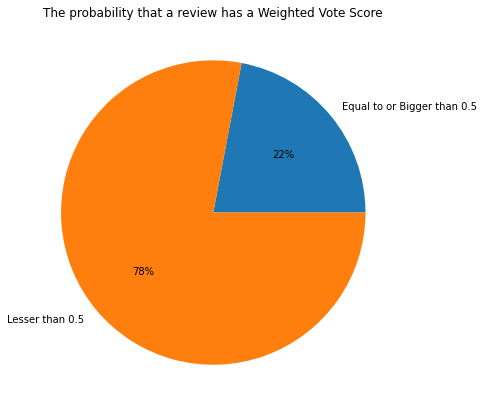

In [86]:
vote_score_series = pd.Series(data=[n_vote_score_larger_05, 
                                    len(dataset_reviews)-n_vote_score_larger_05], 
                              index=['Equal to or Bigger than 0.5', 
                                     'Lesser than 0.5'])

f = plt.figure(figsize=(10, 7))

ax1 = f.add_subplot(1, 1, 1)
ax1.pie(vote_score_series, labels=vote_score_series.index, autopct='%1.0f%%')
ax1.set_title("The probability that a review has a Weighted Vote Score");

## [RQ7.2] What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?

In [87]:
dataset_reviews.columns

Index(['app_id', 'app_name', 'review_id', 'language', 'timestamp_created',
       'timestamp_updated', 'recommended', 'votes_helpful', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'steam_purchase',
       'received_for_free', 'written_during_early_access'],
      dtype='object')

In [88]:
dataset_reviews.query('votes_funny >= 1').query('weighted_vote_score > 0.5').head(2)

,app_id,app_name,review_id,language,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
64,292030,The Witcher 3: Wild Hunt,85167937,schinese,2021-01-22 22:16:15,2021-01-22 22:16:15,True,1,1,0.521739,0,True,False,False
71,292030,The Witcher 3: Wild Hunt,85166822,turkish,2021-01-22 21:49:29,2021-01-22 21:49:29,True,0,1,0.523810,0,True,False,False


In [89]:
n_votes_funny_larger_1 = dataset_reviews.query('weighted_vote_score > 0.5')
n_vote_score_funny = n_votes_funny_larger_1.query('votes_funny >= 1').weighted_vote_score.count()

prob_funny_given_score = (n_vote_score_funny/len(dataset_reviews))*100

print("The probability that a review has at least one vote as " \
      "funny given that the Weighted Vote Score is bigger than 0.5 is {:.2f}%". 
      format(prob_funny_given_score))

The probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5 is 5.35%


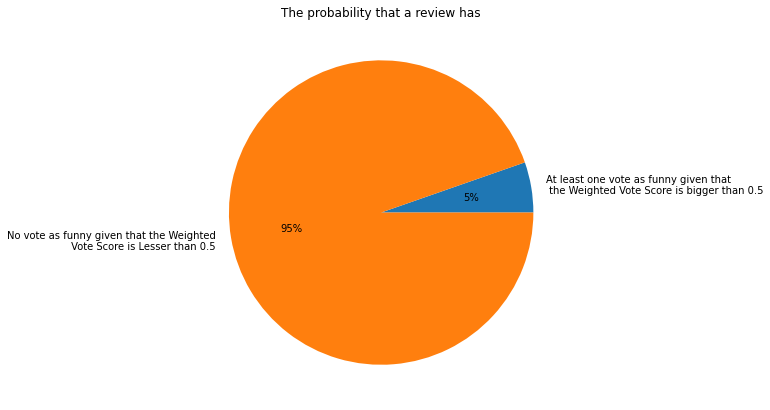

In [90]:
vote_score_funny_series = pd.Series(data=[n_vote_score_funny, 
                                    len(dataset_reviews)-n_vote_score_funny], 
                              index=['At least one vote as funny given that\n the Weighted Vote Score is bigger than 0.5', 
                                     'No vote as funny given that the Weighted\n Vote Score is Lesser than 0.5'])

f = plt.figure(figsize=(10, 7))

ax1 = f.add_subplot(1, 1, 1)
ax1.pie(vote_score_funny_series, labels=vote_score_funny_series.index, autopct='%1.0f%%')
ax1.set_title("The probability that a review has");

## [RQ7.3] Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?


We check the probability of “a review has at least one vote as funny” multiplied by the probability of “probability that a review has a Weighted Vote Score equal or bigger than 0.5”. If the output equals the probability of the intersection, then they are independent on each other. If not, then they are dependent.

The probability of the intersection is the porobability of one given the other multiplied by the probability of the other. 
- `P(A intersect B) = P(A | B) * P(B)`

In [92]:
n_vote_funny = n_votes_funny_larger_1.weighted_vote_score.count()
prob_funny_larger = (n_vote_funny/len(dataset_reviews))*100

In [93]:
intersection_prob = ((prob_funny_given_score/100)*(prob_score_larger/100))*100
intersection_prob

1.1773847459495979

- A: The probability of a review that has at least one vote as funny is `11.99%`
- B: The probability of a review that has a Weighted Vote Score equal or bigger than 0.5 is `22.02%`
- P(A intersect B): The probability of the intersection is `1.17%`

In [94]:
((prob_funny_larger/100)*(prob_score_larger/100))*100

4.7066840804841314

- P(A intersect B) = `1.17%`
- P(A) * P(B) = `2.64%`

So, they are dependent on each other.

# [RQ8] Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check if a hypothesis is correct or not.

## [RQ8.1] Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choice.

We prove with z test that russian review weighted vote score bigger than chinese review

In [96]:
from scipy import stats
from statsmodels.stats import weightstats as stests

In [97]:
rus=dataset[dataset['language']==('russian')].groupby("review_id").weighted_vote_score
chi=dataset[dataset['language']==('schinese')].groupby("review_id").weighted_vote_score
rus_mean = rus.sum().mean()
chi_mean = chi.sum().mean()
print("Mean:",rus_mean,chi_mean)
rus_std = rus.sum().std()
chi_std = chi.sum().std()
print("Std:",rus_std,chi_std)
rus_df=dataset[dataset['language']==('russian')].weighted_vote_score
chi_df=dataset[dataset['language']==('schinese')].weighted_vote_score

Mean: 0.21361939415610642 0.14594083310918515
Std: 0.25775510885913994 0.23972584194307478


In [98]:
#Null hypothesis: Chinese review weighted vote score bigger than russian review
#Alternative hypothesis: Russian review weighted vote score bigger than chinese review
ztest, pval = stests.ztest(rus_df,chi_df,value=(chi_mean-rus_mean), alternative='two-sided')
print("p-value",pval)
if pval <0.05:
    print("we reject null hypothesis")
else: 
    print("we accept null hypothesis")

p-value 0.0
we reject null hypothesis


## [RQ8.2] Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.

In [99]:
df_diff = dataset["timestamp_updated"]-dataset["timestamp_created"]
df_diff = pd.Series(df_diff,name="time_diff")
df_diff.to_frame()

,time_diff
0,0 days 00:00:00
1,0 days 00:00:00
2,0 days 00:00:00
3,0 days 00:00:00
4,0 days 00:00:00
...,...
21612439,0 days 00:00:00
21612440,0 days 00:00:00
21612441,0 days 00:00:00
21612442,16 days 03:43:11


In [100]:
df_time=pd.concat([dataset,df_diff],axis=1)

In [101]:
#change date time data to int seconds data
df_time["time_diff"]=df_time["time_diff"].dt.total_seconds()
df_time

,app_id,app_name,review_id,language,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,time_diff
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,0,0.000000,0,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03,0.0
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,0,0.000000,0,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27,0.0
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,0,0.000000,0,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17,0.0
3,292030,The Witcher 3: Wild Hunt,85184605,english,2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,0,0.000000,0,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44,0.0
4,292030,The Witcher 3: Wild Hunt,85184287,schinese,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,0,0.000000,0,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,2021-01-16 09:10:49,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21612439,546560,Half-Life: Alyx,65645125,english,2020-03-23 18:05:04,2020-03-23 18:05:04,True,0,0,0.000000,0,True,False,False,76561197967033932,431,7,432.0,0.0,29.0,2020-04-11 17:56:56,0.0
21612440,546560,Half-Life: Alyx,65645115,english,2020-03-23 18:04:53,2020-03-23 18:04:53,True,0,0,0.000000,0,False,False,False,76561198046495482,70,10,3296.0,15.0,24.0,2021-01-19 18:17:11,0.0
21612441,546560,Half-Life: Alyx,65645100,english,2020-03-23 18:04:33,2020-03-23 18:04:33,True,0,0,0.474138,0,True,False,False,76561198176379749,79,17,2654.0,0.0,34.0,2020-06-08 16:29:13,0.0
21612442,546560,Half-Life: Alyx,65645066,english,2020-03-23 18:03:51,2020-04-08 21:47:02,True,0,0,0.386022,11,True,False,False,76561198041763187,140,3,210.0,0.0,12.0,2020-05-17 11:36:55,1395791.0


In [102]:
df_time=df_time[["weighted_vote_score","time_diff"]].copy()

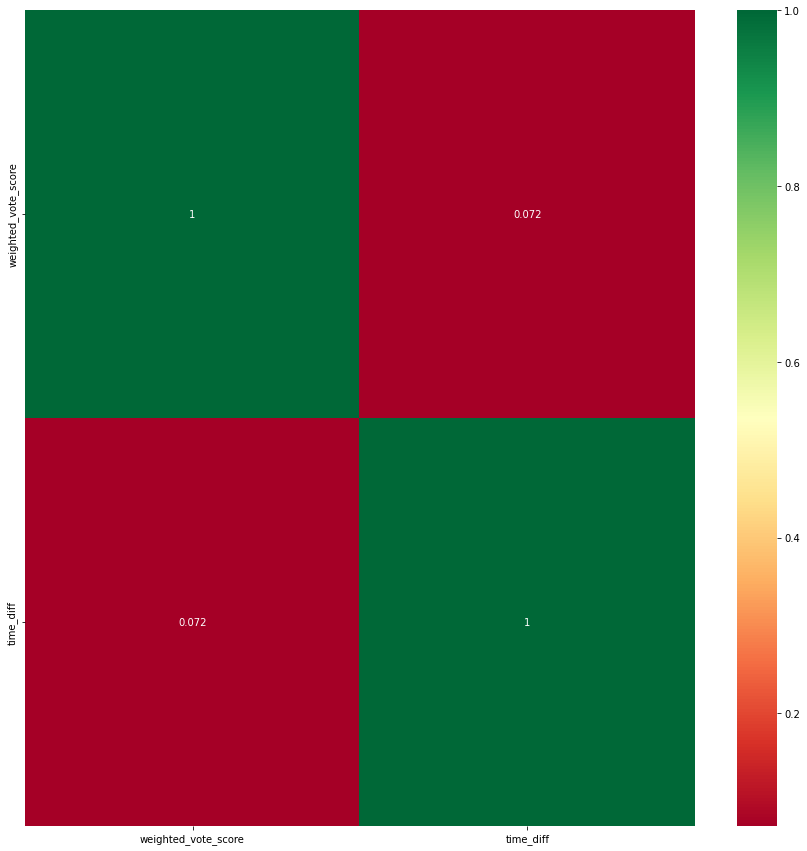

In [103]:
plt.subplots(figsize=(15, 15))
sns.heatmap(df_time.corr(), annot=True,cmap ='RdYlGn') 

In [104]:
weight_mean = df_time["weighted_vote_score"].mean()
time_mean = df_time["time_diff"].mean()
print("Mean:",weight_mean,time_mean)
weight_std = df_time["weighted_vote_score"].std()
time_std = df_time["time_diff"].std()
print("Std:",weight_std,time_std)

Mean: 0.1656774686764465 3131297.807891509
Std: 0.24348519780637065 15504414.280510863


In [105]:
#Time diff affect to weighted vote score
#Time diff doesnt affect to weighted vote score
ztest, pval = stests.ztest(df_time["weighted_vote_score"], df_time["weighted_vote_score"], value=(time_mean-weight_mean), alternative='two-sided')
print("p-value",pval)
if pval <0.05:
    print("we reject null hypothesis")
else: 
    print("we accept null hypothesis")

p-value 0.0
we reject null hypothesis


also we see in corr graph weak relation its mean that time diff doesnt affect to weighted vote score

## [RQ8.3] Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.

In [106]:
df_time=pd.concat([dataset,df_diff],axis=1)
#change date time data to int seconds data
df_time["time_diff"]=df_time["time_diff"].dt.total_seconds()
df_time=df_time[["recommended","weighted_vote_score","time_diff"]].copy()
df_time["recommended"]=df_time["recommended"].astype(int)
df_time

,recommended,weighted_vote_score,time_diff
0,1,0.000000,0.0
1,1,0.000000,0.0
2,1,0.000000,0.0
3,1,0.000000,0.0
4,1,0.000000,0.0
...,...,...,...
21612439,1,0.000000,0.0
21612440,1,0.000000,0.0
21612441,1,0.474138,0.0
21612442,1,0.386022,1395791.0


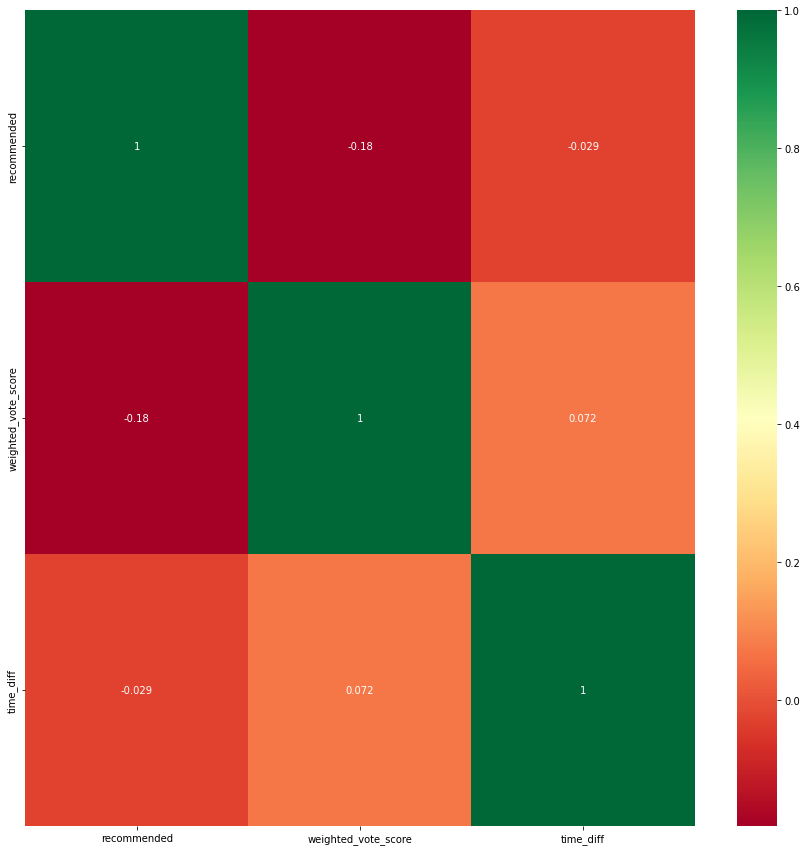

In [107]:
plt.subplots(figsize=(15, 15))
sns.heatmap(df_time.corr(), annot=True,cmap ='RdYlGn') 

In [108]:
#Groups means are equal
#At least, one group mean is different from other groups
fvalue, pvalue = stats.f_oneway(df_time["recommended"],df_time["weighted_vote_score"],df_time["time_diff"])
print("F-value:",fvalue,"P-value:",pvalue)
if pval <0.05:
    print("we reject null hypothesis")
else: 
    print("we accept null hypothesis")
    

F-value: 881539.4577946777 P-value: 0.0
we reject null hypothesis


We dont see any dependences in this cases

## [RQ8.4] What are histograms, bar plots, scatterplots and pie charts used for?

## [RQ8.5] What insights can you extract from a Box Plot?

# TQ1




```
Input: 
    A: array of length n
    k: integers between 1 and n
    
function alg(A, k):
  s <-- a random element of A
  set L = [all the elements of A with value <= s]
  set R = [all the elements of A with value > s]
  r = len(L)
  if k == r:
    return s
  else if k < r:  
    return alg(L, k)
  else:
    return alg(R, k - r)

```


## [TQ1.1] What does the algorithm compute?

The algorithm take a random number in the list $A$, than split the list in two sublist $L$ and $R$. $L$ is the sublist with all the elements of A with value less or ugual than the picked random number, $R$ contain the remain item (i.e. the strictly larger than the random number). If $K == cardinality(L)$ than return the random number picked from A. Else we have two option: return a random number from the list $L$ or a random number from the list $R$. Repeat until $K == cardinality(L)$.

## [TQ1.2] What is asymptotically (i.e., we are asking for big-O complexity) the running time of the algorithm in the worst case, as a function of n?

First option: 

* if $k<n$ and $s=max(A)$ for all the call of the algorithm, the algorithm goes in loop. So there is no point to compute the running cost.

Avoiding simil approch, in witch we have a _finite_ number of time of the previous case unitl the change of $ s \neq max(A)$ we can think at the worst case as:

Second option:

* We begin with $k=1$ and $s=max(A)$, so $L=A$ and we enter on $alg(L,k)$ ( $T(n)=\mathcal{O}(2n)$ ). Now in this $2^{th}$ call we have $s=\text{the second max of A}$ than $L = ( A$ \ without the max $\big)$ and $r = n-1$  ($T(n) = \mathcal{O}(2n)+ \mathcal{O}(2n) = 2*\mathcal{O}(2n)$. We enter in $alg(L,k)$ and so on like before until $r = 1$. Then we have $n-1$ call of the algorithms and than the running cost is $T(n) = (n-1)*\mathcal{O}(2n) = \mathcal{O}(2n^2)$ 

##  [TQ1.3] What is asymptotically the running time of the algorithm in the best case?

We came up with two best cases:

* $k = 1$ and $s = min(A)$ than $L = [min(A)]$ with $r = 1$ so the algorithm stop at the first _if_ with time complexity of  $\mathcal{O}(2n) = \mathcal{O}(n)+\mathcal{O}(n)$ that is the running cost for the list comprehension or the for cicle in make the L and R list.

or

* $k = n$ and s = $max(A)$ than $L = A$ with $ r = n$ so the algorithm stop at the first _if_ with time complexity of $\mathcal{O}(2n)$ as before


# TQ2: 



```
function splitSwap(a, l, n):
  if n <= 1:
    return
  splitSwap(a, l, n/2)
  splitSwap(a, l+ n /2, n/2)
  swapList(a, l, n)
```



```
function swapList(a, l, n):
  for i = 0 to n/2:
    tmp = a[l + i]
    a[l + i] = a[l + n/2 + i]
    a[l + n/2 + i] = tmp
```



## [TQ2.1] How much running time does it take to execute splitSwap(a, 0, n)? (We want a Big O analysis.)

First of all we need to assume that $n < len(a)$. The assumption is becasue if $n \geq len(a)$ the function goes out of index range in access the element of the array a in the function swapList. 

This function swapList is a $\mathcal{O}(\frac{3}{2}n)$ because we have a:

$$
\begin{equation*}
    \sum_{i=0}^{n/2} (\Theta(1) + \Theta(1) +  
    \Theta(1) ) = (\frac{n}{2}+1)(3\Theta(1)) = \Theta(\frac{3}{2}n)
\end{equation*}
$$

Take $T(n)$ the running cost equation of the function splitSwap. First of all is a recursive function so we identify the base cases: $T(n=0)=T(n=1)=\Theta(1)$.

The function:

$$
\begin{equation*}
    T(n) = T(n/2)+T(n/2)+\Theta(\frac{3}{2}n) = 2T(n/2)+\Theta(\frac{3}{2}n) 
\end{equation*}
$$

Now we resolve the function iterating over:

$$
\begin{align*}
    T(n) &= 2T(\frac{n}{2})+\Theta(\frac{3}{2}n)\\
        &= 2\bigg[ 2T(\frac{\frac{n}{2}}{2})+\Theta(\frac{3}{2}\frac{n}{2})\bigg] +\Theta(\frac{3}{2}n)
        = 2^2T(\frac{n}{2^2}) + 2\Theta(\frac{3}{2}n)\\
        &= 2^2\bigg[ 2T(\frac{\frac{n}{2^2}}{2}) +\Theta(\frac{3}{2}\frac{n}{2^2})\bigg] + 2\Theta(\frac{3}{2}n)
        = 2^3T(\frac{n}{2^3})+ 3\Theta(\frac{3}{2}n)\\
        &= \ldots = \\
        &= 2^kT(\frac{n}{2^k})+k\Theta(\frac{3}{2}n)\\
        &= \text{stop in $\frac{n}{2^k}=1 \xrightarrow{} k = \log(n)$}\\
        &= nT(1) + \log(n)\Theta(\frac{3}{2}n)\\
        &= \Theta(n) + \Theta(\frac{3}{2}n\log(n))\\
        &= \Theta(\frac{3}{2}n\log(n)) = \mathcal{O}(2n\log(n))
\end{align*}
$$

Then the running cost of the algorithm is $\mathcal{O}(2n\log(n))$

## [TQ2.2] What does this algorithm do? Is it optimal? Describe the mechanism of the algorithm in details, we do not want to know only its final result.

### Input of the algorithm

The algorithm takes as input:<br>
a = array of len(a) <br>
l, n = two index which we use to extract a partial part of the array, the sub_array = [ a[l],a[l+1],...a[l+n] ] that will be array we will work on, more precisly only this element will be swapped.

For this poprouse to avoid python error of indexing we will assert that:<br>
$n < len(a);$<br>
$l + n < len(a).$

### The algorithm

The algorithm has two call to the function itself than the call to the function _swapList_.

First of all the function __swapList__ does the job of the overall algorithm. It takes the array a, the two index l,n and swap the elements bewteen the range element: a[l] to a[l+n/2] and return the array with the element swapped.

The two initial call of __splitSwap__  is use to split the array in two subarray that will be swapped in the swapList function.

The two subarray we can image as: 

sub_array1 = element $a[l]$ to $a[l+n/2]$;

sub_array2 = element $a[l+n/2]$ to $a[n]$.


At the end of the algorithm we will have the previous array a but with the elements $a[l],a[l+1],...,a[l+n]$ swapped.

### Let's take a look inside the algorithm

The index n can make confusion, but lets take a look in a portion of the algorithm:

we can use: $a = [0,1,2,3,4,5,6,7]$ <br>
splitSwap(a,0, n=4) calls:<br>
1) splitSwap(a, 0, n=2)<br>
2) splitSwap(a, l=2, n=2)<br>
3) swapList(a,0,4)

Lets enter in the 1) splitSwap:

1.1) splitSwap(a,0,1)<br>
1.2) splitSwap(a,0,1)<br>
1.3) swapList(a,0,2)

than: 1.1) and 1.2) terminates because $n = 1$;<br>
so we enter in swapList who swap element $a[l=0]$ to $a[l+n=2]$:  $[-->1, 2, 0<---, 3, 4, 5, 6, 7]$<br>
terminate the 1).

Lets enter in the 2) splitSwap:<br>
2.1) splitSwap(a,2,1)<br>
2.2) splitSwap(a,3,1)<br>
2.3) swapList(a,2,2)<br>

than: 2.1) and 2.2) terminates because $n = 1$;<br>
so we enter in swapList who swap element $a[l=2]$ to $a[l+n=4]$:  $[1, 2, --->3, 4, 0<---, 5, 6, 7]$<br>
terminate the 2).

In conclusion after the two call 1) and 2) we re-enter in the function splitSwap(a,0, n=4) with l=0, n=4 and we can see that 
we swap the two subarray: sub_array1 = element $a[l]$ to $ a[l+n/2]$ and sub_array2 = element $a[l+n/2]$ to $a[n]$   (l=0, n = 4).
We terminate in 3) and swap the union of the two subarray $a[l=0]$ to $a[l+n=4]$.

### It can be optimal?

The algorithm is like a quicksort but instead of a function that sort pivoting we swap the in non sort elements. We can't do best than $\mathcal{O}(nlogn)$ 


# TQ3

In the knapsack problem we are given n objects and each object i has a weight $w_i$ and a value $v_i$. We are also given a weight budget W. The problem is to select a set of objects with total weight bounded by W that maximized the sum of their values. The following are three natural heuristics:
 
* Order them in increasing order of weight and then visit them sequentially, adding them to the solution as long as the budget is not exceeded

* Order them in decreasing order of values, and then visit them sequentially, adding them to the solution if the budget is not exceeded

* Order them in decreasing relative value $(v_i / w_i)$, and then visit them sequentially, adding them to the solution if the budget is not exceeded

For each of the heuristics, provide a counterexample, that is, an example of a problem instance in which the heuristic fails to provide the optimal solution.

## Order them in increasing order of weight and then visit them sequentially, adding them to the solution as long as the budget is not exceeded

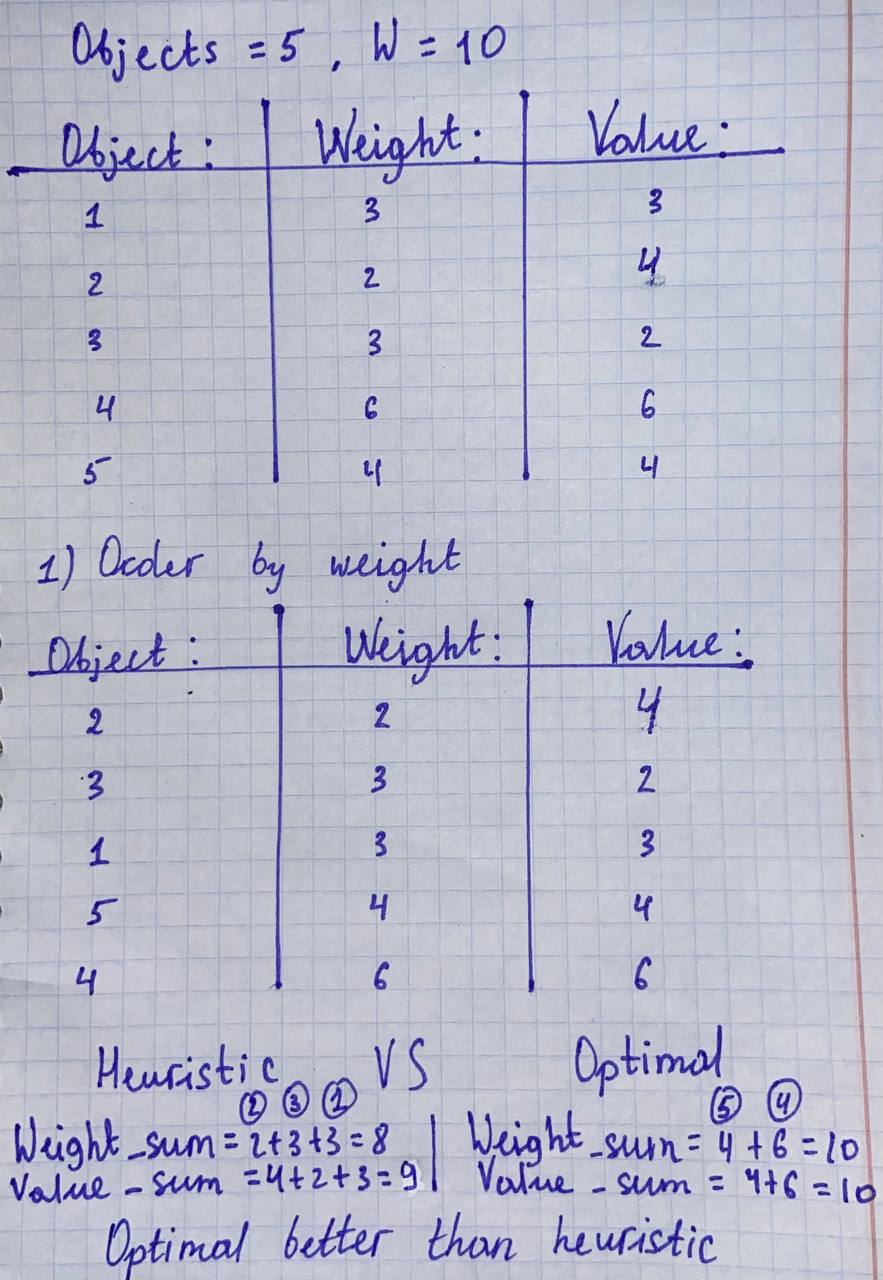

In [9]:
from IPython.display import Image
Image("./1.jpg")

## Order them in decreasing order of values, and then visit them sequentially, adding them to the solution if the budget is not exceeded


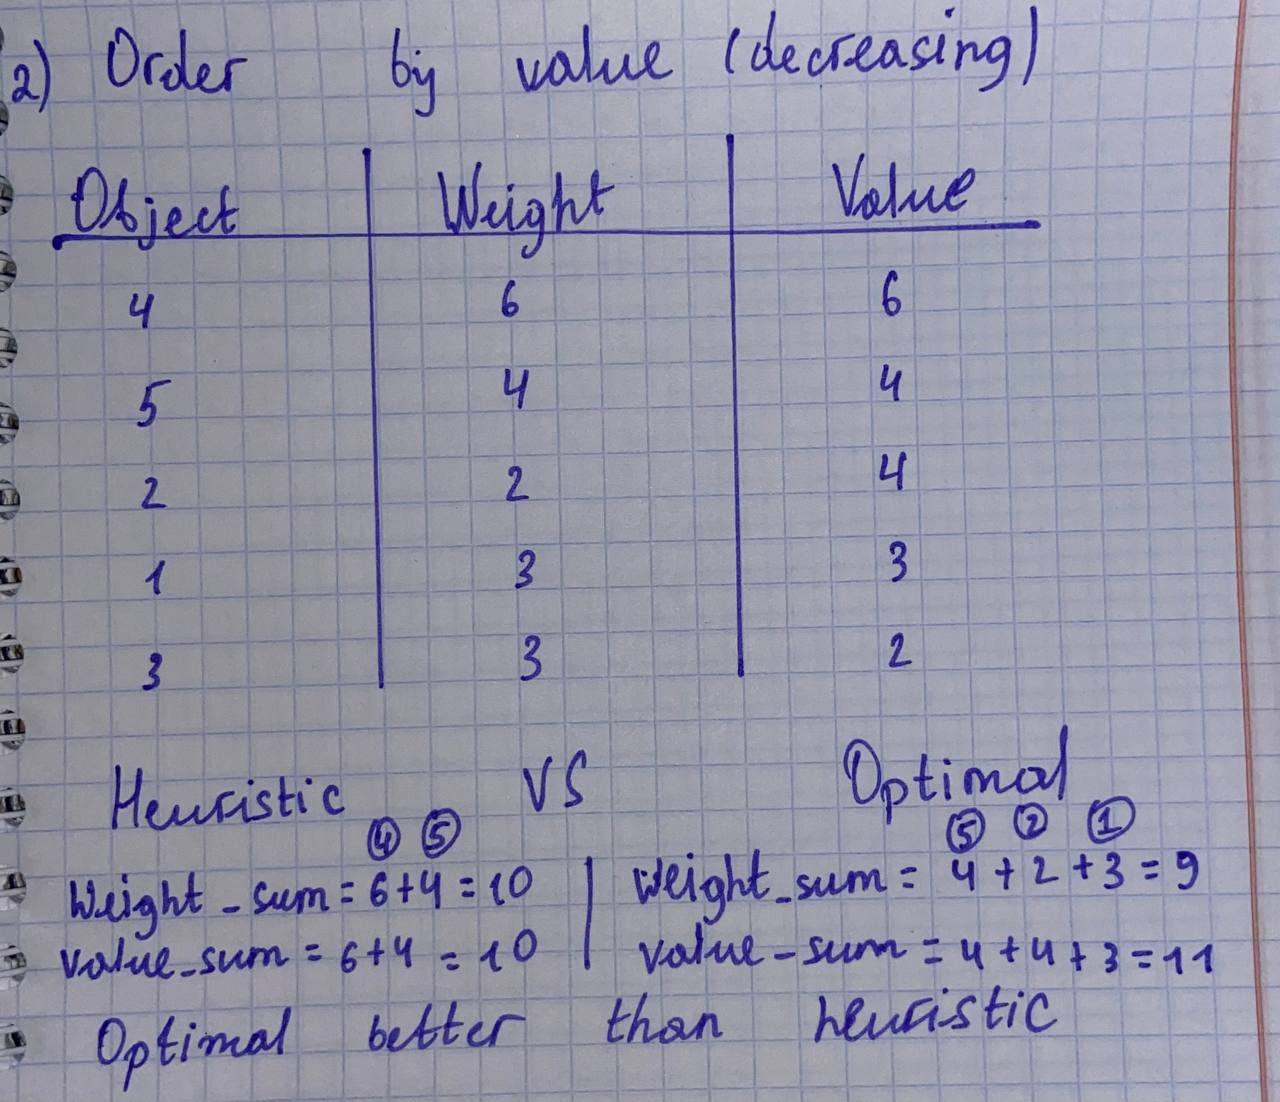

In [10]:
Image("2.jpg")

## Order them in decreasing relative value $(v_i / w_i)$, and then visit them sequentially, adding them to the solution if the budget is not exceeded

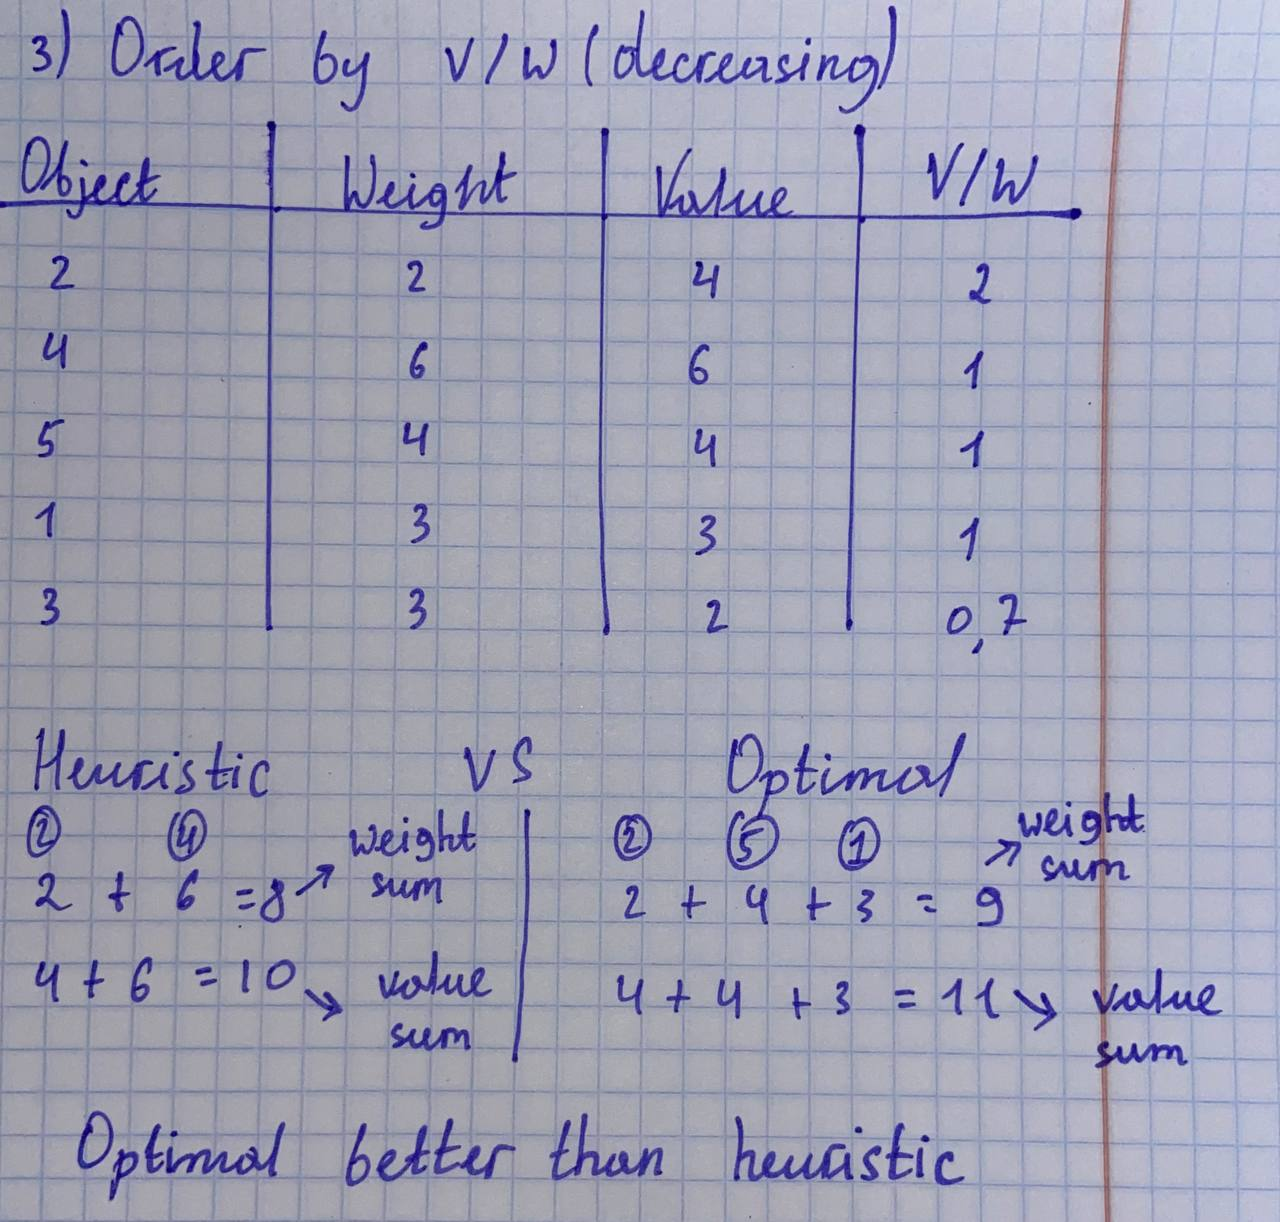

In [12]:
Image("3.jpg")